In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
from PIL import Image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
print(tf.__version__)
print(tf.test.is_gpu_available())

1.13.1
False


In [3]:
training_df = pd.read_csv("train.csv")

In [4]:
training_df.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [5]:
def load_data(df):
    #Return a new array of given shape and type, without initializing entries.
    data = np.empty((17500,32,32,3),dtype='float32')    
    label = np.empty((17500,),dtype='uint8')
    imgs = os.listdir('train')
    imgs.sort()
    num = len(imgs)
    for i in range(num):
        img = Image.open('train/'+imgs[i])
        arr = np.asarray(img,dtype='float32')
        data[i,:,:,:] = arr
        label[i] = int(df.iloc[i]['has_cactus'])
    return data, label

In [6]:
train_x, train_y = load_data(training_df)

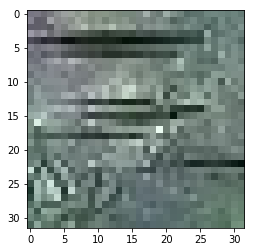

In [7]:
import matplotlib.pyplot as plt 
im = plt.imshow(train_x[0])
plt.show()

In [8]:
train_x = train_x.reshape(17500,32*32*3) 

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(train_x)

array([[ 0.52777779,  0.5411765 ,  0.49019611, ...,  0.53968257,
         0.43307087,  0.50980395],
       [ 0.45634922,  0.42745101,  0.44705886, ...,  0.48809522,
         0.43307087,  0.47450984],
       [ 0.6150794 ,  0.54509807,  0.61960787, ...,  0.59126985,
         0.49606299,  0.52941179],
       ..., 
       [ 0.38492066,  0.35686275,  0.37647063, ...,  0.43650794,
         0.4094488 ,  0.41176474],
       [ 0.56746036,  0.51372552,  0.52549022, ...,  0.56349206,
         0.51181102,  0.52156866],
       [ 0.68650794,  0.58039218,  0.63921571, ...,  0.35714287,
         0.38582677,  0.36078432]], dtype=float32)

In [10]:
train_x = train_x.reshape(17500,32,32,3) 

In [11]:
x_train, x_valid, y_train, y_valid = train_test_split(
...     train_x, train_y, test_size=0.1, random_state=42)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Input
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization, Reshape, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [13]:
CNN = Sequential()
CNN.add(Conv2D(32,kernel_size=(3,3),activation='relu',strides=(1,1),input_shape=(32,32,3)))
CNN.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
CNN.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
CNN.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
CNN.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(MaxPooling2D(pool_size=(2,2)))
CNN.add(Dropout(0.25))
CNN.add(Flatten())
CNN.add(Dense(128, activation='relu'))
CNN.add(Dropout(0.5))
CNN.add(Dense(1, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
CNN.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])

In [15]:
CNN.fit(x_train,y_train,batch_size=64,epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
15750/15750 [==============================] - 290s 18ms/sample - loss: 3.9770 - acc: 0.7505
Epoch 2/5
15750/15750 [==============================] - 284s 18ms/sample - loss: 3.9770 - acc: 0.7505
Epoch 3/5
15750/15750 [==============================] - 283s 18ms/sample - loss: 3.9770 - acc: 0.7505
Epoch 4/5
15750/15750 [==============================] - 282s 18ms/sample - loss: 3.9770 - acc: 0.7505
Epoch 5/5
15750/15750 [==============================] - 282s 18ms/sample - loss: 3.9770 - acc: 0.7505


In [16]:
score = CNN.evaluate(x_valid, y_valid, verbose=0)
print("loss:",score[0])
print("accu:",score[1])

loss: 3.96282152394
accu: 0.751429


In [17]:
dropout_dense_layer = 0.5

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(dropout_dense_layer))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(dropout_dense_layer))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [18]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

In [19]:
callbacks = [EarlyStopping(monitor='loss', patience=25),
             ModelCheckpoint(filepath='best_model.h5', monitor='loss', save_best_only=True)]

In [20]:
epochs = 5
history = model.fit(x_train,
                    y_train,
        batch_size = 64,
          epochs=epochs,
          verbose=1,
          shuffle=True,
          callbacks=callbacks)

Epoch 1/5
15750/15750 [==============================] - 217s 14ms/sample - loss: 0.1261 - acc: 0.9483
Epoch 2/5
15750/15750 [==============================] - 211s 13ms/sample - loss: 0.0703 - acc: 0.9761
Epoch 3/5
15750/15750 [==============================] - 211s 13ms/sample - loss: 0.0424 - acc: 0.9856
Epoch 4/5
15750/15750 [==============================] - 211s 13ms/sample - loss: 0.0386 - acc: 0.9881
Epoch 5/5
15750/15750 [==============================] - 210s 13ms/sample - loss: 0.0483 - acc: 0.9841


In [21]:
score = model.evaluate(x_valid, y_valid, verbose=0)
print("loss:",score[0])
print("accu:",score[1])

loss: 0.029557557436
accu: 0.993143


In [22]:
test_data = np.empty((17500,32,32,3),dtype='float32') 
imgs = os.listdir('test')
imgs.sort()
num = len(imgs)
for i in range(num):
    img = Image.open('test/'+imgs[i])
    arr = np.asarray(img,dtype='float32')
    test_data[i,:,:,:] = arr

In [23]:
pred = model.predict(test_data, batch_size=1, verbose=1)

17500/17500 [==============================] - 206s 12ms/sample


In [24]:
pred_binary = [0 if value<0.50 else 1 for value in pred]  